<a href="https://colab.research.google.com/github/eliasedgar99/taller1_inteligencia_artificial/blob/main/taller1_Inteligencia_Artificial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import heapq

# Definimos las dimensiones de la cuadrícula
GRID_SIZE = 10

# Definimos las direcciones posibles (arriba, abajo, izquierda, derecha, y diagonales)
DIRECTIONS = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]

def heuristic(a, b):
    """Función heurística usando la distancia de Chebyshev para considerar movimientos diagonales."""
    return max(abs(a[0] - b[0]), abs(a[1] - b[1]))

def a_star_search(start, goal, grid):
    """Implementación del algoritmo A* en una cuadrícula con movimientos diagonales."""
    # El set de nodos visitados
    open_set = []
    heapq.heappush(open_set, (0, start))

    # Mantenemos un diccionario de donde hemos venido
    came_from = {}

    # Costos acumulados desde el inicio
    g_score = {start: 0}

    # F-scores para priorizar nodos
    f_score = {start: heuristic(start, goal)}

    while open_set:
        # Seleccionamos el nodo con menor f_score
        current = heapq.heappop(open_set)[1]

        # Si llegamos al objetivo, reconstruimos el camino
        if current == goal:
            return reconstruct_path(came_from, current)

        for direction in DIRECTIONS:
            neighbor = (current[0] + direction[0], current[1] + direction[1])

            # Verificamos si el vecino está dentro de la cuadrícula y no es un obstáculo
            if 0 <= neighbor[0] < GRID_SIZE and 0 <= neighbor[1] < GRID_SIZE and not grid[neighbor[0]][neighbor[1]]:
                tentative_g_score = g_score[current] + 1

                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    # Actualizamos los costos
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return None  # Retorna None si no hay camino

def reconstruct_path(came_from, current):
    """Reconstruye el camino desde el objetivo hasta el inicio."""
    total_path = [current]
    while current in came_from:
        current = came_from[current]
        total_path.append(current)
    return total_path[::-1]  # Retorna el camino invertido para que vaya del inicio al objetivo

def print_grid(grid, path=None):
    """Función para imprimir la cuadrícula y el camino."""
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            if path and (i, j) in path:
                print("P", end=" ")
            elif grid[i][j] == 1:
                print("X", end=" ")
            else:
                print(".", end=" ")
        print()
    print()

# Configuración de la cuadrícula (0 = libre, 1 = obstáculo)
grid = [[0]*GRID_SIZE for _ in range(GRID_SIZE)]

# Ejemplo de obstáculos
grid[1][9] = 1
grid[2][9] = 1
grid[3][9] = 1
grid[4][9] = 1
grid[5][9] = 1
grid[5][5] = 1

# Definimos los puntos de inicio y fin
start = (0, 0)
goal = (9, 9)

# Ejecutamos el algoritmo A*
path = a_star_search(start, goal, grid)

# Mostramos la cuadrícula y el camino encontrado
if path:
    print("Ruta encontrada:")
    print_grid(grid, path)
else:
    print("No se encontró un camino.")


Ruta encontrada:
P . . . . . . . . . 
. P . . . . . . . X 
. . P . . . . . . X 
. . . P . . . . . X 
. . . . P P . . . X 
. . . . . X P . . X 
. . . . . . P . . . 
. . . . . . . P . . 
. . . . . . . . P . 
. . . . . . . . . P 



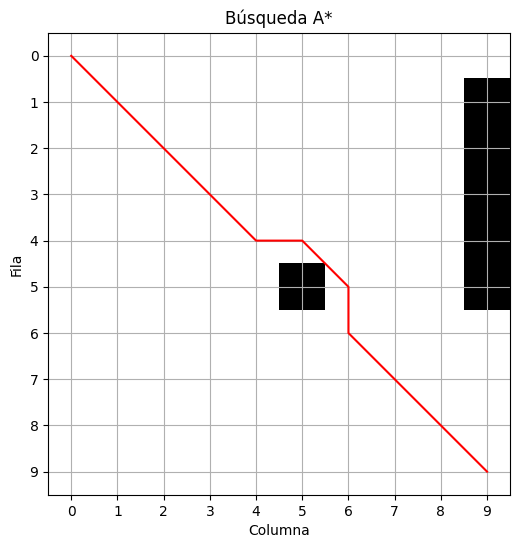

In [44]:
import matplotlib.pyplot as plt

# Graficamos la cuadrícula
plt.figure(figsize=(6, 6))
plt.imshow([[1 if cell == 1 else 0 for cell in row] for row in grid], cmap='binary')

# Si se encontró un camino, lo graficamos
if path:
    x_coords, y_coords = zip(*path)
    plt.plot(y_coords, x_coords, color='red')

# Configuramos los ejes y mostramos la gráfica
plt.xticks(range(GRID_SIZE))
plt.yticks(range(GRID_SIZE))
plt.xlabel('Columna')
plt.ylabel('Fila')
plt.title('Búsqueda A*')
plt.grid(True)
plt.show()
